# Artificial Neural Network (ANN) Project

The data set was extracted from data provided by the US Census Bureau. The task is to 
find the set of demographic characteristics that can best predict whether or not the 
individual has an income of over $50,000 per year. For each record, there are fourteen 
attributes, and one output variable. Further information on the data set follows below. 
The training data set is USCensusTraining.csv and contains all the fields for 25,000 
records. The test data set is USCensusTest.csv; it contains 7561 records, and is missing 
the income field.

Dataset: https://www.kaggle.com/uciml/adult-census-income

General Tasks:

* Generate a neural network to predict income using the other attributes.
 
* Identify the most important variables for predicting income.
 
* Assess and interpret the predicted accuracy. 
 
* Compare the predicted income with actual income, and interpret the error types.
 
* Identify occupations, education leve,s and ages associated with predicted income over $50,000. 

* Construct a histogram of important and unimportant numeric variables in the model, with 
an overlay of income to assess if they support the findings of the neural network.

* Use best model for prediction.

### Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df_train = pd.read_csv("USCensusTraining.csv")

Make a copy for the completely raw dataset for crosstab analysis (without any manipulations).

In [3]:
df_crosstab = df_train.copy()

In [4]:
df_train.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


In [5]:
df_train.isnull().sum()

age               0
workclass         0
demogweight       0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
df_train.describe()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week
count,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000
mean,38.606920,1.897418e+05,10.081440,1088.579040,86.49992,40.407440
std,13.687769,1.052947e+05,2.557035,7486.621197,401.25358,12.299267
min,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.00000,40.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.00000,40.000000
75%,48.000000,2.368610e+05,12.000000,0.000000,0.00000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.00000,99.000000


In [7]:
df_train.columns

Index(['age', 'workclass', 'demogweight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education       25000 non-null  object
 4   education-num   25000 non-null  int64 
 5   marital-status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital-gain    25000 non-null  int64 
 11  capital-loss    25000 non-null  int64 
 12  hours-per-week  25000 non-null  int64 
 13  native-country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


### Part One
(a) Generate a neural network to predict income using the other attributes. You may need to ignore one of the attributes. Describe the topology of the resulting network and draw a detailed picture of the network topology, labeling the input and output layers.

## Data Preparation

In [9]:
from sklearn import preprocessing

In [10]:
df_train["income"].value_counts()

<=50K.    19016
>50K.      5984
Name: income, dtype: int64

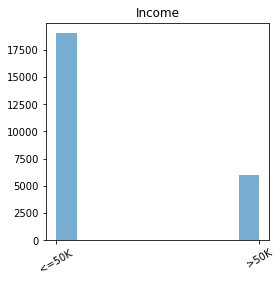

In [11]:
plt.figure(figsize=(4,4))
plt.hist(df_train["income"], alpha=0.6)
ticks = [0.0,1.0]
labels = ["<=50K",">50K"]
plt.xticks(ticks, labels, rotation=30)
plt.title("Income")
plt.show()

- Therefore, we can see that the bottomline classification rate is 19016/25000 = 76.064%

In [12]:
df_train["education-num"].value_counts()

9     8120
10    5597
13    4140
14    1300
11    1059
7      909
12     801
6      721
4      491
15     430
5      394
8      323
16     315
3      244
2      120
1       36
Name: education-num, dtype: int64

In [13]:
df_train = df_train.drop("education-num",axis=1)

In [15]:
df_train['occupation'].replace({'?':np.NaN},inplace=True)
df_train['workclass'].replace({'?':np.NaN},inplace=True)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       23601 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education       25000 non-null  object
 4   marital-status  25000 non-null  object
 5   occupation      23596 non-null  object
 6   relationship    25000 non-null  object
 7   race            25000 non-null  object
 8   sex             25000 non-null  object
 9   capital-gain    25000 non-null  int64 
 10  capital-loss    25000 non-null  int64 
 11  hours-per-week  25000 non-null  int64 
 12  native-country  25000 non-null  object
 13  income          25000 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.7+ MB


We can observe that there are 1404 occupations missing. There are several options:
1. drop all the rows with missing occupations
2. KNN imputation (to fill the missing value)
3. keep null as another level here. <br>
- For now, we will go for option 3.

In [17]:
df_train['occupation'].replace({np.NaN:'?'},inplace=True)
df_train['workclass'].replace({np.NaN:'?'},inplace=True)

In [18]:
df_train['occupation'].isnull().sum()

0

In [19]:
df_train.select_dtypes('object').columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [20]:
categorical_cols = list(df_train.select_dtypes('object').columns)[:-1]

In [21]:
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [22]:
df_train_dum = pd.get_dummies(df_train, columns = categorical_cols)

In [23]:
df_train_dum.head()

,age,demogweight,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,2174,0,40,<=50K.,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,<=50K.,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,<=50K.,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,<=50K.,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,<=50K.,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_train_dum["income"] = df_train_dum["income"].map({'<=50K.':0,'>50K.':1})

In [25]:
df_train_dum["income"].value_counts()

0    19016
1     5984
Name: income, dtype: int64

In [26]:
df_train_dum.shape

(25000, 108)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
y = df_train_dum["income"]

In [29]:
X = df_train_dum.drop("income", axis=1)

In [30]:
seed = 7

In [31]:
np.random.seed(seed)

Note: we need to do the train_test_split prior to standardize the whole dataset, as we assume that we don't know the distribution of the holdout dataset. 
- the "holdout" set will also be transformed according to trainset's distribution.

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=seed)

In [33]:
scaler = preprocessing.MinMaxScaler()

In [34]:
scaled_X_train = scaler.fit_transform(X_train)

In [35]:
scaled_X_val = scaler.transform(X_val)

In [36]:
cols = [x for x in list(df_train_dum.columns) if x !='income' ]

In [37]:
scaled_df_train = pd.DataFrame(scaled_X_train, columns=cols)

In [38]:
scaled_df_train.head()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.178082,0.049334,0.00000,0.0,0.551020,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.356164,0.191264,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.465753,0.096036,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.260274,0.009470,0.03325,0.0,0.448980,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.260274,0.043603,0.00000,0.0,0.551020,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
scaled_df_train.describe()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.296053,0.116492,0.011183,0.020009,0.401937,0.05565,0.029950,0.065850,0.00025,0.693500,...,0.000900,0.004000,0.000300,0.002650,0.001750,0.000550,0.000500,0.897600,0.002050,0.000450
std,0.187518,0.071724,0.076586,0.092371,0.125983,0.22925,0.170454,0.248026,0.01581,0.461051,...,0.029987,0.063121,0.017318,0.051411,0.041797,0.023446,0.022356,0.303181,0.045232,0.021209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.067613,0.000000,0.000000,0.397959,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.273973,0.108680,0.000000,0.000000,0.397959,0.00000,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.424658,0.148651,0.000000,0.000000,0.448980,0.00000,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis (EDA)

In [40]:
import seaborn as sns

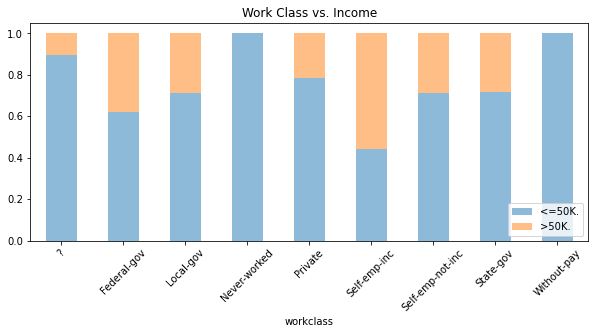

In [41]:
crosstab = pd.crosstab(df_crosstab["workclass"], df_crosstab["income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Work Class vs. Income", alpha=0.5,figsize=(10,4))
plt.xticks(rotation=45)
plt.legend(loc=4)
plt.show()

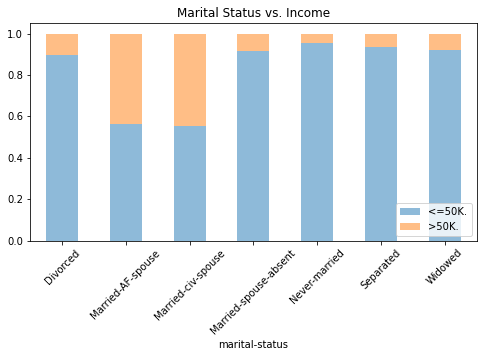

In [42]:
crosstab = pd.crosstab(df_crosstab["marital-status"], df_crosstab["income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Marital Status vs. Income", alpha=0.5,figsize=(8,4))
plt.xticks(rotation=45)
plt.legend(loc=4)
plt.show()

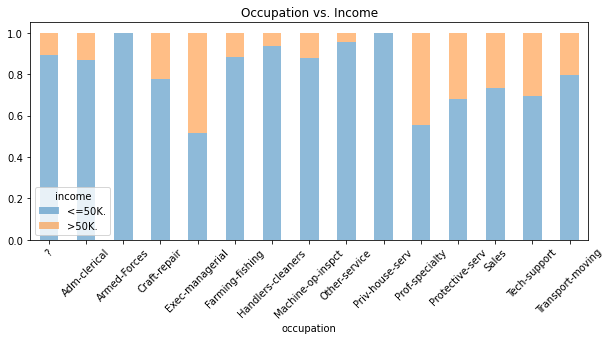

In [43]:
crosstab = pd.crosstab(df_crosstab["occupation"], df_crosstab["income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Occupation vs. Income", alpha=0.5,figsize=(10,4))
plt.xticks(rotation=45)
plt.show()

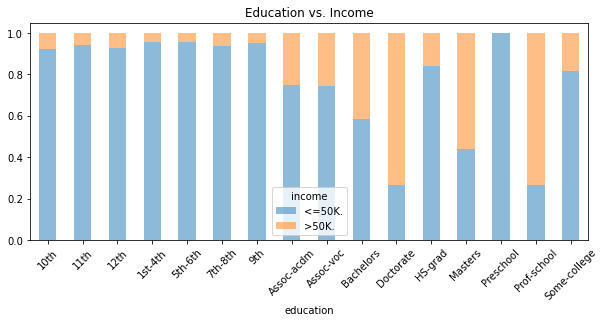

In [44]:
crosstab = pd.crosstab(df_crosstab["education"], df_crosstab["income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Education vs. Income", alpha=0.5,figsize=(10,4))
plt.xticks(rotation=45)
plt.show()

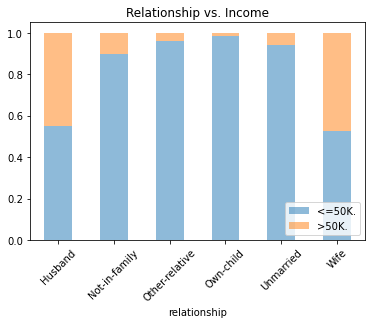

In [45]:
crosstab = pd.crosstab(df_crosstab["relationship"], df_crosstab["income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title= "Relationship vs. Income", alpha=0.5,figsize=(6,4))
plt.xticks(rotation=45)
plt.legend(loc=4)
plt.show()

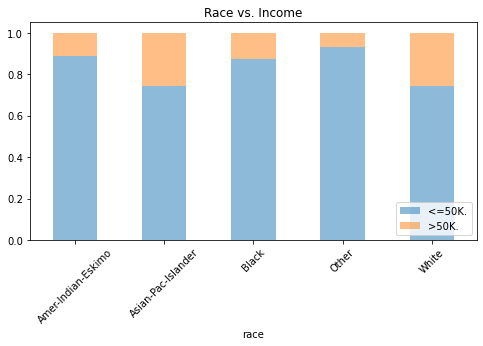

In [46]:
crosstab = pd.crosstab(df_crosstab["race"], df_crosstab["income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Race vs. Income", alpha=0.5,figsize=(8,4))
plt.xticks(rotation=45)
plt.legend(loc=4)
plt.show()

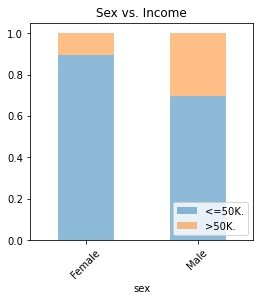

In [47]:
crosstab = pd.crosstab(df_crosstab["sex"], df_crosstab["income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Sex vs. Income", alpha=0.5,figsize=(4,4))
plt.xticks(rotation=45)
plt.legend(loc=4)
plt.show()

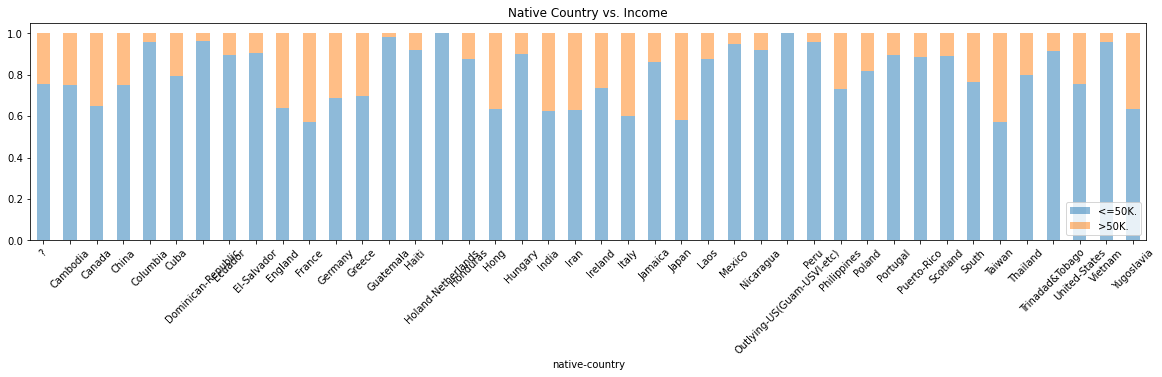

In [48]:
crosstab = pd.crosstab(df_crosstab["native-country"], df_crosstab["income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Native Country vs. Income", alpha=0.5,figsize=(20,4))
plt.xticks(rotation=45)
plt.legend(loc=4)
plt.show()

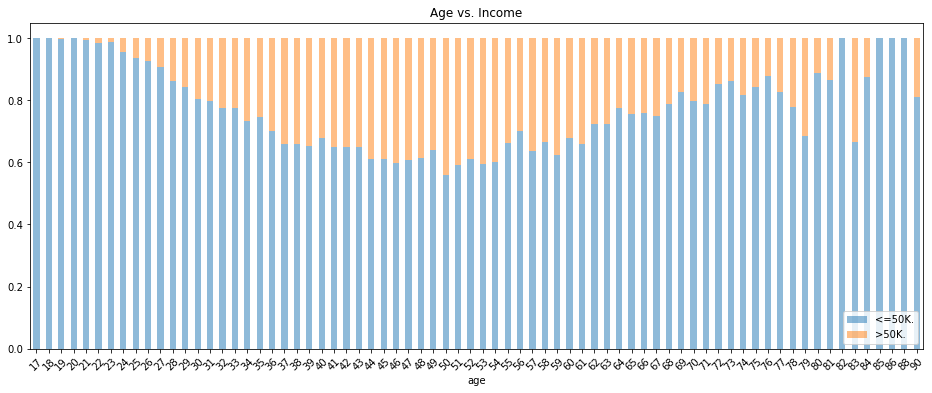

In [49]:
crosstab = pd.crosstab(df_crosstab["age"], df_crosstab["income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Age vs. Income", alpha=0.5,figsize=(16,6))
plt.xticks(rotation=45)
plt.legend(loc=4)
plt.show()

In [50]:
df_crosstab["income"] = df_crosstab["income"].map({'<=50K.':0,'>50K.':1})

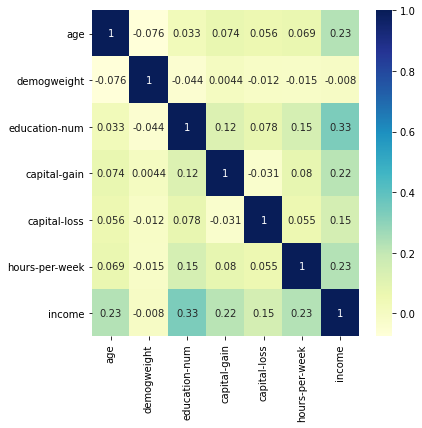

In [51]:
plt.figure(figsize=(6,6))
sns.heatmap(df_crosstab.corr(method='pearson'),cmap="YlGnBu", annot=True)
plt.show()

- According to the last row of the heatmap, we can see that most numerical variables are somewhat correlated with the income except for `demogweight`.

In [52]:
y_train.value_counts()

0    15187
1     4813
Name: income, dtype: int64

Check the amount of data that we can fully used. 

In [53]:
df_crosstab.replace({'?':np.NaN},inplace=True)

In [54]:
df_crosstab.isnull().any(axis=1).sum()

1829

- naive model will give an classification rate of 75.93%

## Model
- baseline model (logistic regression)
- initial model
- hyperparameter tuning through grid search + cross validation

### Baseline Model 
- logisitic regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [58]:
log_reg = LogisticRegression()

In [59]:
log_reg.fit(scaled_X_train,y_train)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = log_reg.predict(scaled_X_val)

In [61]:
accuracy_score(y_val,y_pred)

0.8494

In [62]:
roc_auc_score(y_val,y_pred)

0.7519878967625155

<AxesSubplot:>

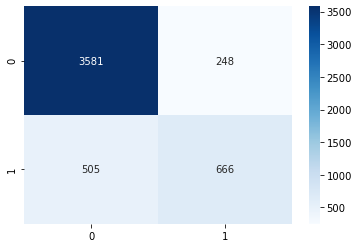

In [63]:
sns.heatmap(confusion_matrix(y_val,y_pred), annot=True, cmap='Blues', fmt='d')

In [64]:
lgr_matrix = confusion_matrix(y_val,y_pred)

<AxesSubplot:>

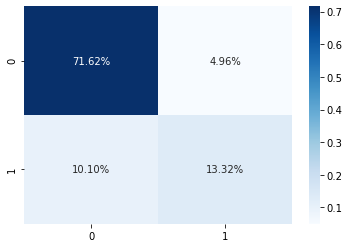

In [65]:
sns.heatmap(lgr_matrix/np.sum(lgr_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### Initial Model
- figure out the basic neural network structure
- test on the heldout dataset
    - accuracy
    - auc score (for imbalanced dataset)

In [66]:
from keras.models import Sequential

In [67]:
from keras.layers import Dense
from keras.layers import Dropout

In [68]:
import keras.backend as K

In [69]:
import keras
import tensorflow as tf

In [70]:
metrics = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), 
]

In [71]:
input_dim = scaled_X_train.shape[1]

In [72]:
model = Sequential()

In [73]:
model.add(Dense(input_dim*2,input_dim=input_dim,kernel_initializer='uniform', activation='relu'))

In [74]:
# model.add(Dropout(0.1))

In [75]:
# model.add(Dense(100,input_dim=input_dim,kernel_initializer='uniform', activation='relu'))

In [76]:
# model.add(Dense(50,input_dim=200,kernel_initializer='uniform', activation='relu'))

In [77]:
# model.add(Dropout(0.1))

In [78]:
model.add(Dense(input_dim,input_dim=input_dim*2,kernel_initializer='uniform', activation='relu'))

In [79]:
# model.add(Dense(30,input_dim=92,kernel_initializer='uniform', activation='relu'))

In [80]:
# model.add(Dense(10,input_dim=input_dim,kernel_initializer='uniform', activation='relu'))

In [81]:
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

- probably reassign the weight for the binary cross entropy function(like pytorch)

For adam, the default lr is 0.001.

In [82]:
lr=5e-4

In [83]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=lr),metrics=metrics)

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 214)               23112     
                                                                 
 dense_1 (Dense)             (None, 107)               23005     
                                                                 
 dense_2 (Dense)             (None, 1)                 108       
                                                                 
Total params: 46,225
Trainable params: 46,225
Non-trainable params: 0
_________________________________________________________________


- customize weight to solve the imbalanced dataset issue. 

In [85]:
class_weight = {0: 1.,
                1: 3.}

In [86]:
baseline_model = model.fit(scaled_X_train,y_train, epochs=100, batch_size=20,class_weight=class_weight,verbose=1)

Epoch 1/100
1000/1000 [==============================] - 2s 1ms/step - loss: 0.6551 - accuracy: 0.7757 - precision: 0.5216 - recall: 0.8244 - auc: 0.8722 - prc: 0.6826
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5919 - accuracy: 0.7962 - precision: 0.5498 - recall: 0.8442 - auc: 0.8967 - prc: 0.7351
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5729 - accuracy: 0.8017 - precision: 0.5578 - recall: 0.8498 - auc: 0.9030 - prc: 0.7506
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.8069 - precision: 0.5655 - recall: 0.8539 - auc: 0.9078 - prc: 0.7604
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5490 - accuracy: 0.8112 - precision: 0.5719 - recall: 0.8562 - auc: 0.9109 - prc: 0.7687
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.8132 - precision: 0.5751 - recall: 0.8571 - auc: 0.9127 - prc:

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, recall_score

In [88]:
metrics = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [89]:
y_pred = model.predict(scaled_X_val)

In [90]:
m = tf.keras.metrics.AUC()
m.update_state(y_val,y_pred)

In [91]:
m.result().numpy()

0.8613279

In [92]:
acc = tf.keras.metrics.BinaryAccuracy()
acc.update_state(y_val,y_pred)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.0>

In [93]:
acc.result().numpy()

0.8062

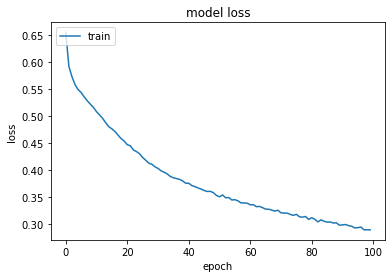

In [94]:
plt.plot(baseline_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

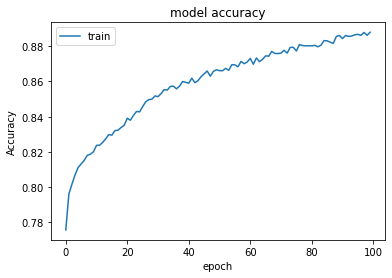

In [95]:
plt.plot(baseline_model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

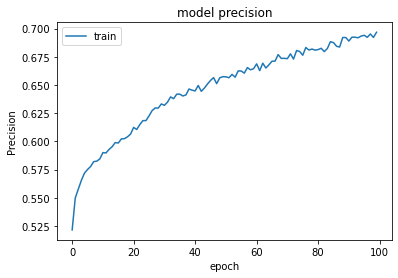

In [96]:
plt.plot(baseline_model.history['precision'])
plt.title('model precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

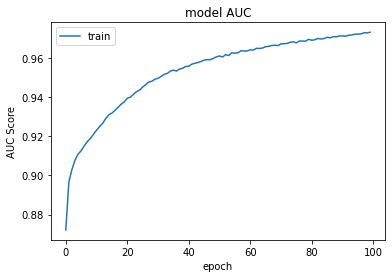

In [97]:
plt.plot(baseline_model.history['auc'])
plt.title('model AUC')
plt.ylabel('AUC Score')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

### Feature Importance
(b) Which are the most important variables for predicting income? 
- try to find out a feature to extract feature importance here.
- probably just answer this question according to commmon sense as neural network is actually hard to interpret.
- `SHAP` or `LIME`: two major feature importance visulization APIs.

In [98]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return model.predict(X).flatten()

In [99]:
# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent. (make sure going over the majority - make it 100)
X_train_summary = shap.kmeans(scaled_X_train, 100)

In [100]:
# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

In [101]:
# random select a number of rows
random_indices = np.random.choice(scaled_X_train.shape[0], size=200, replace=False)
X_train_sample = scaled_X_train[random_indices, :]

In [102]:
# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
 
shap_values  = explainer.shap_values(X_train_sample)

  0%|          | 0/200 [00:00<?, ?it/s]

In [103]:
shap_values.shape

(200, 107)

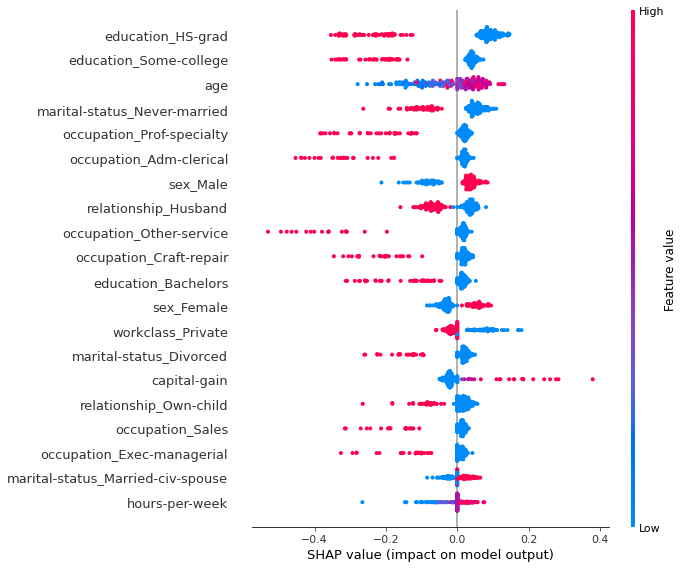

In [104]:
shap.summary_plot(shap_values, X_train_sample,feature_names=X_train.columns)

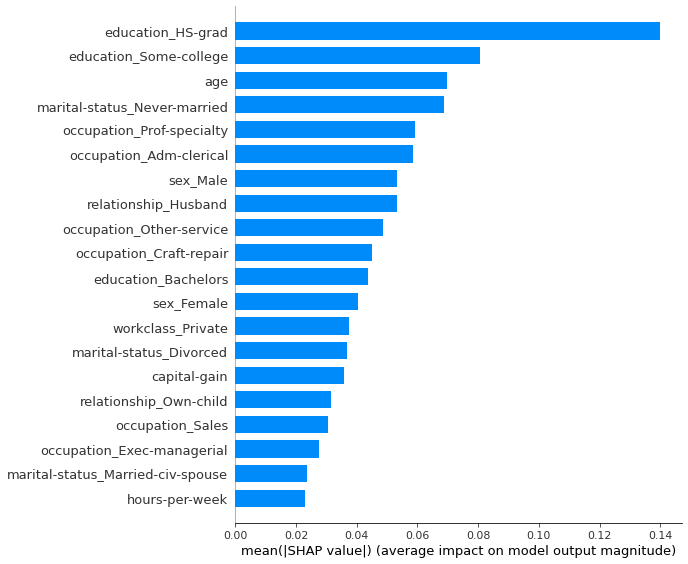

In [105]:
shap.summary_plot(shap_values, scaled_X_train, plot_type="bar",feature_names=X_train.columns)

The default threshold for keras.metrics.BinaryAccuracy is `0.5`.

In [106]:
y_pred = list(y_pred)

In [107]:
y_pred_label = (model.predict(scaled_X_val) > 0.5).astype(int)

In [108]:
cf_matrix = confusion_matrix(y_val,y_pred_label)

<AxesSubplot:>

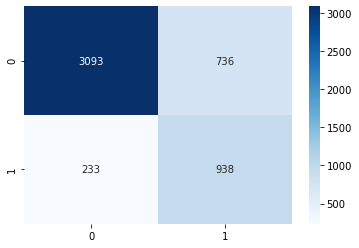

In [109]:
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')

<AxesSubplot:>

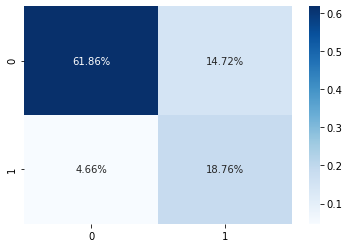

In [110]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### Grid Search for Neural Network
- for feature importance: do sensitivity analysis according to the mean of the whole dataset (107 rows) - using a for loop
- adjust it and feed it into the neural network -- see whether it changes or not. 

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
from keras.wrappers.scikit_learn import KerasClassifier

In [115]:
lr = 5e-4

In [116]:
adam = tf.keras.optimizers.Adam(learning_rate=lr)

In [117]:
def create_model(neurons=[input_dim,input_dim],init='uniform',optimizer=adam):
    model = Sequential()
    model.add(Dense(neurons[0],input_dim=input_dim,kernel_initializer=init, activation='relu'))
    model.add(Dense(neurons[1],input_dim=neurons[0],kernel_initializer=init, activation='relu'))
#     model.add(Dense(neurons[2],input_dim=neurons[1],kernel_initializer=init, activation='relu'))
    model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=metrics)
    return model

In [118]:
n_epoch = 50
batch_size = 20

In [119]:
model = KerasClassifier(build_fn=create_model, verbose=0)

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


In [120]:
rms = tf.keras.optimizers.RMSprop(learning_rate=lr)

In [121]:
sgd = tf.keras.optimizers.SGD(learning_rate=lr)

In [122]:
neurons = [[128, 64], [256, 128],[128,128]]
optimizers = [adam,rms,sgd]
init = ['normal', 'uniform']
epochs = np.array([50,75,100])
batch_size = np.array([16,32,64])

In [123]:
param_grid = dict(neurons=neurons,optimizer=optimizers, nb_epoch=epochs, batch_size=batch_size, init=init)

In [124]:
grid = GridSearchCV(estimator=model,param_grid=param_grid)

We will use all the training data in the grid search + cross validation approach.

In [125]:
grid_result = grid.fit(scaled_X_train,y_train)

In [126]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.841400 using {'batch_size': 16, 'init': 'normal', 'nb_epoch': 75, 'neurons': [256, 128], 'optimizer': <keras.optimizer_v2.adam.Adam object at 0x7f7c61724850>}


In [128]:
means = grid_result.cv_results_['mean_test_score']

In [129]:
stds = grid_result.cv_results_['std_test_score']

In [130]:
params = grid_result.cv_results_['params']

In [131]:
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with %r" % (mean, stdev, param))

In [132]:
grid_result.best_params_

{'batch_size': 16,
 'init': 'normal',
 'nb_epoch': 75,
 'neurons': [256, 128],
 'optimizer': <keras.optimizer_v2.adam.Adam at 0x7f7c61724850>}

In [133]:
best_model = grid.best_estimator_

This gives us the best model according to grid search and cross validation. 

In [134]:
y_pred2 = best_model.predict(scaled_X_val)

In [135]:
y_pred_label2 = (best_model.predict(scaled_X_val) > 0.5).astype(int)

In [136]:
accuracy_score(y_val,y_pred_label2)

0.847

In [137]:
roc_auc_score(y_val,y_pred_label2)

0.7610914190526297

In [138]:
f1_score(y_val,y_pred_label2)

0.6473029045643154

In [139]:
cf_matrix2 = confusion_matrix(y_val,y_pred_label2)

<AxesSubplot:>

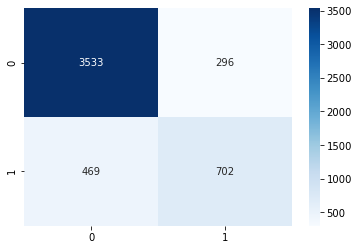

In [140]:
sns.heatmap(cf_matrix2, annot=True, cmap='Blues', fmt='d')

<AxesSubplot:>

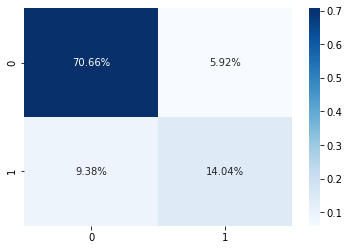

In [141]:
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, 
            fmt='.2%', cmap='Blues')

**(d). Compare the predicted income with actual income. Which error is the model more 
prone to making? Is this type of error more protective of, say, banks or loan 
applicants?**

In [164]:
X_val_pred = pd.DataFrame(X_val, columns=cols)

In [166]:
X_val_pred.head()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
21752,41,194360,0,1887,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7208,30,151773,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
17058,28,201954,0,0,65,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
20754,43,187778,0,0,20,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22505,49,219021,0,0,48,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [167]:
X_val_pred["Predicted_Income"] = y_pred2

In [168]:
X_val_pred.head()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,Predicted_Income
21752,41,194360,0,1887,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7208,30,151773,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
17058,28,201954,0,0,65,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
20754,43,187778,0,0,20,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22505,49,219021,0,0,48,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [178]:
df_wk_pred = X_val_pred[['workclass_?','workclass_Federal-gov','workclass_Local-gov','workclass_Never-worked','workclass_Private','workclass_Self-emp-inc','workclass_Self-emp-not-inc','workclass_State-gov','workclass_Without-pay']]
df_wk_pred["Predicted_Income"] = y_pred2

In [250]:
df_edu_pred = X_val_pred[['education_10th','education_11th','education_12th','education_1st-4th','education_5th-6th','education_7th-8th','education_9th','education_Assoc-acdm','education_Assoc-voc','education_Bachelors','education_Doctorate','education_HS-grad','education_Masters','education_Preschool','education_Prof-school','education_Some-college',]]
df_edu_pred["Predicted_Income"] = y_pred2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


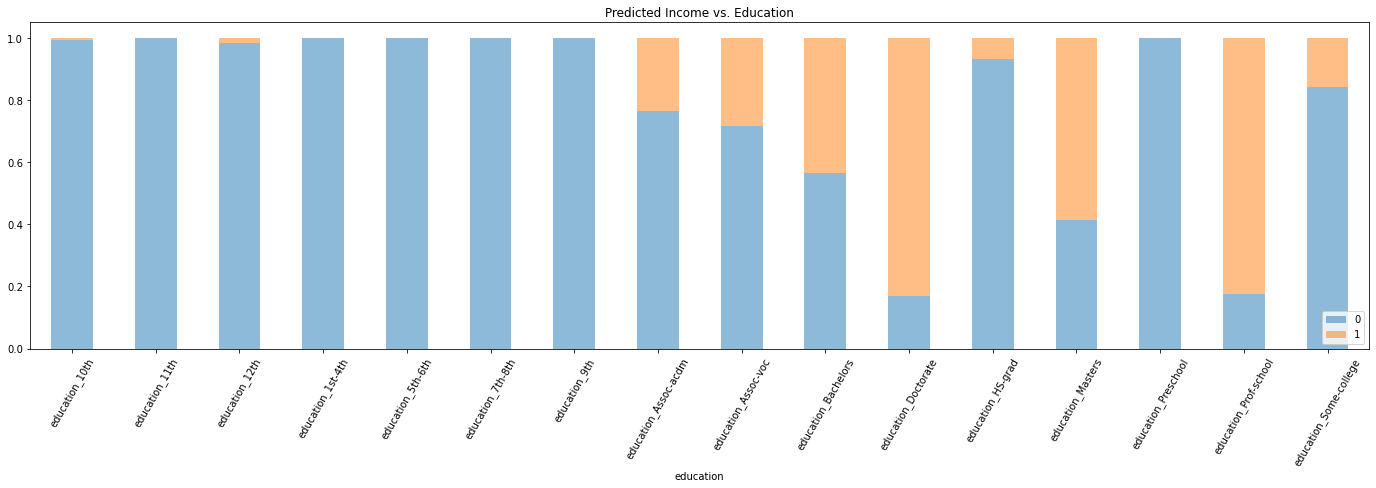

In [251]:
df_edu_pred2 = df_edu_pred.idxmax(axis=1)
df_edu_pred = pd.DataFrame(df_edu_pred2,columns=["education"])
df_edu_pred["Predicted_Income"] = y_pred2
crosstab = pd.crosstab(df_edu_pred["education"], df_edu_pred["Predicted_Income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Predicted Income vs. Education", alpha=0.5,figsize=(24,6))
plt.xticks(rotation=60)
plt.legend(loc=4)
plt.show()

In [248]:
df_marry_pred = X_val_pred[['marital-status_Divorced','marital-status_Married-AF-spouse','marital-status_Married-civ-spouse','marital-status_Married-spouse-absent','marital-status_Never-married','marital-status_Separated','marital-status_Widowed',]]
df_marry_pred["Predicted_Income"] = y_pred2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


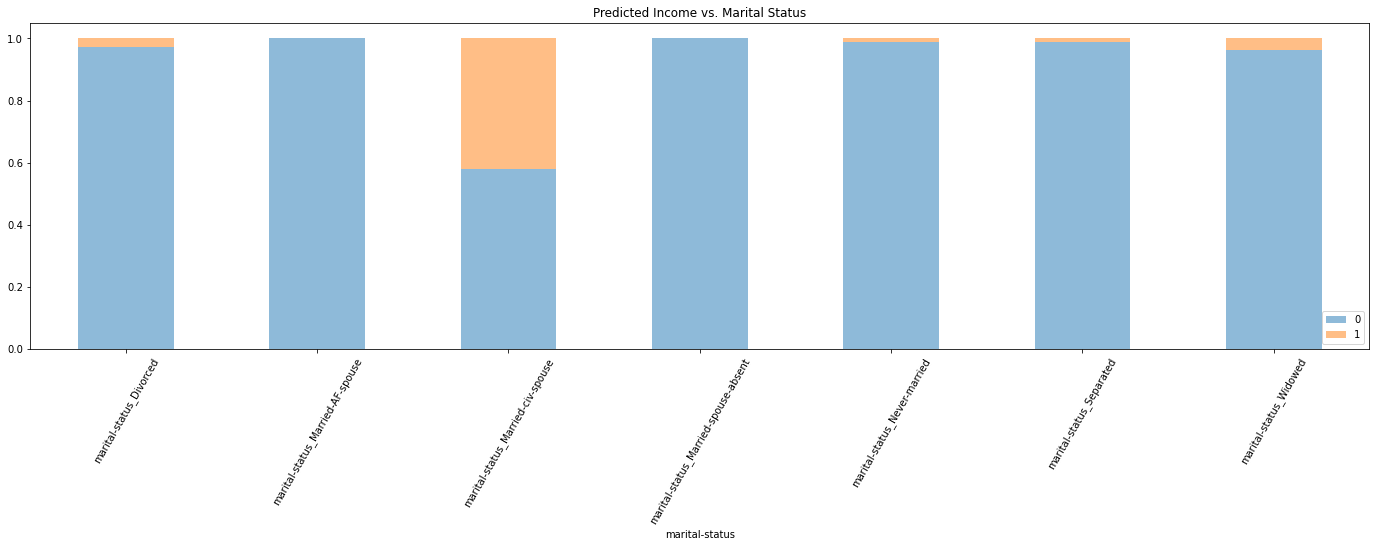

In [249]:
df_marry_pred2 = df_marry_pred.idxmax(axis=1)
df_marry_pred = pd.DataFrame(df_marry_pred2,columns=["marital-status"])
df_marry_pred["Predicted_Income"] = y_pred2
crosstab = pd.crosstab(df_marry_pred["marital-status"], df_marry_pred["Predicted_Income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Predicted Income vs. Marital Status", alpha=0.5,figsize=(24,6))
plt.xticks(rotation=60)
plt.legend(loc=4)
plt.show()

In [252]:
df_occ_pred = X_val_pred[['occupation_?','occupation_Adm-clerical','occupation_Armed-Forces','occupation_Craft-repair','occupation_Exec-managerial','occupation_Farming-fishing','occupation_Handlers-cleaners','occupation_Machine-op-inspct','occupation_Other-service','occupation_Priv-house-serv','occupation_Prof-specialty','occupation_Protective-serv','occupation_Sales','occupation_Tech-support','occupation_Transport-moving']]
df_occ_pred["Predicted_Income"] = y_pred2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


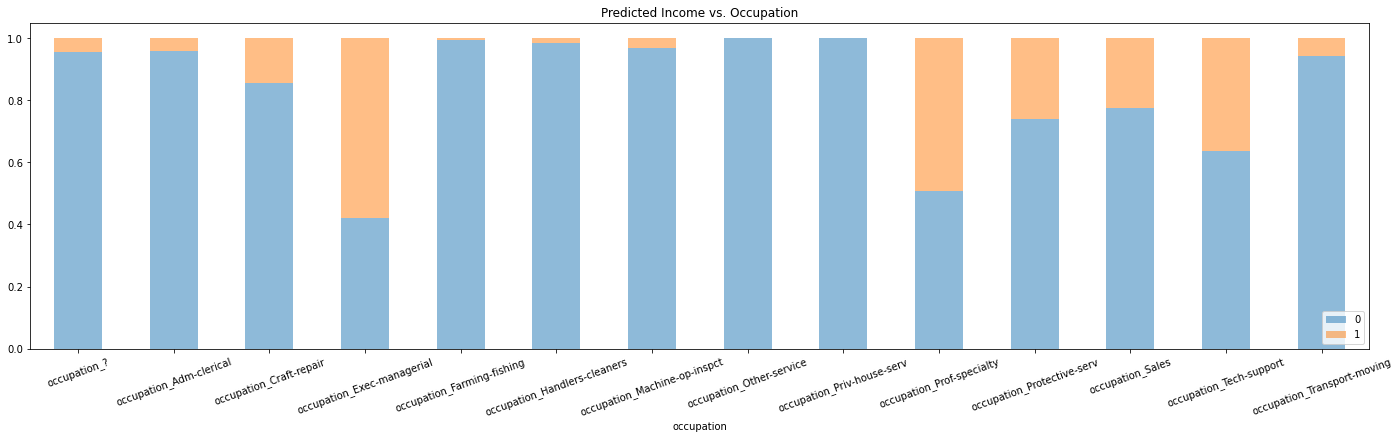

In [253]:
df_occ_pred2 = df_occ_pred.idxmax(axis=1)
df_occ_pred = pd.DataFrame(df_occ_pred2,columns=["occupation"])
df_occ_pred["Predicted_Income"] = y_pred2
crosstab = pd.crosstab(df_occ_pred["occupation"], df_occ_pred["Predicted_Income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Predicted Income vs. Occupation", alpha=0.5,figsize=(24,6))
plt.xticks(rotation=20)
plt.legend(loc=4)
plt.show()

In [254]:
df_race_pred = X_val_pred[['race_Amer-Indian-Eskimo','race_Asian-Pac-Islander','race_Black','race_Other','race_White']]
df_race_pred["Predicted_Income"] = y_pred2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [256]:
df_sex_pred = X_val_pred[['sex_Female','sex_Male']]
df_sex_pred["Predicted_Income"] = y_pred2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [259]:
df_nat_pred = X_val_pred[['native-country_?','native-country_Cambodia','native-country_Canada','native-country_China','native-country_Columbia','native-country_Cuba','native-country_Dominican-Republic','native-country_Ecuador','native-country_El-Salvador','native-country_England','native-country_France','native-country_Germany','native-country_Greece','native-country_Guatemala','native-country_Haiti','native-country_Holand-Netherlands','native-country_Honduras','native-country_Hong','native-country_Hungary','native-country_India','native-country_Iran','native-country_Ireland','native-country_Italy','native-country_Jamaica','native-country_Japan','native-country_Laos','native-country_Mexico','native-country_Nicaragua','native-country_Outlying-US(Guam-USVI-etc)','native-country_Peru','native-country_Philippines','native-country_Poland','native-country_Portugal','native-country_Puerto-Rico','native-country_Scotland','native-country_South','native-country_Taiwan','native-country_Thailand','native-country_Trinadad&Tobago','native-country_United-States','native-country_Vietnam','native-country_Yugoslavia']]
df_nat_pred["Predicted_Income"] = y_pred2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:>

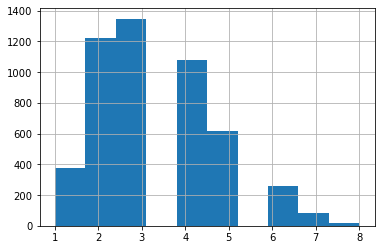

In [341]:
# equal-size binning
X_val_pred['age_bin1'] = X_val_pred['age']
X_val_pred.loc[X_val_pred['age_bin1'] <= 20, 'age_bin1'] = 1
X_val_pred.loc[(X_val_pred['age_bin1'] > 20) & (X_val_pred['age_bin1'] <= 30), 'age_bin1'] = 2
X_val_pred.loc[(X_val_pred['age_bin1'] > 30) & (X_val_pred['age_bin1'] <= 40), 'age_bin1'] = 3
X_val_pred.loc[(X_val_pred['age_bin1'] > 40) & (X_val_pred['age_bin1'] <= 50), 'age_bin1'] = 4
X_val_pred.loc[(X_val_pred['age_bin1'] > 50) & (X_val_pred['age_bin1'] <= 60), 'age_bin1'] = 5
X_val_pred.loc[(X_val_pred['age_bin1'] > 60) & (X_val_pred['age_bin1'] <= 70), 'age_bin1'] = 6
X_val_pred.loc[(X_val_pred['age_bin1'] > 70) & (X_val_pred['age_bin1'] <= 80), 'age_bin1'] = 7
X_val_pred.loc[(X_val_pred['age_bin1'] > 80), 'age_bin1'] = 8
X_val_pred["age_bin1"].hist()

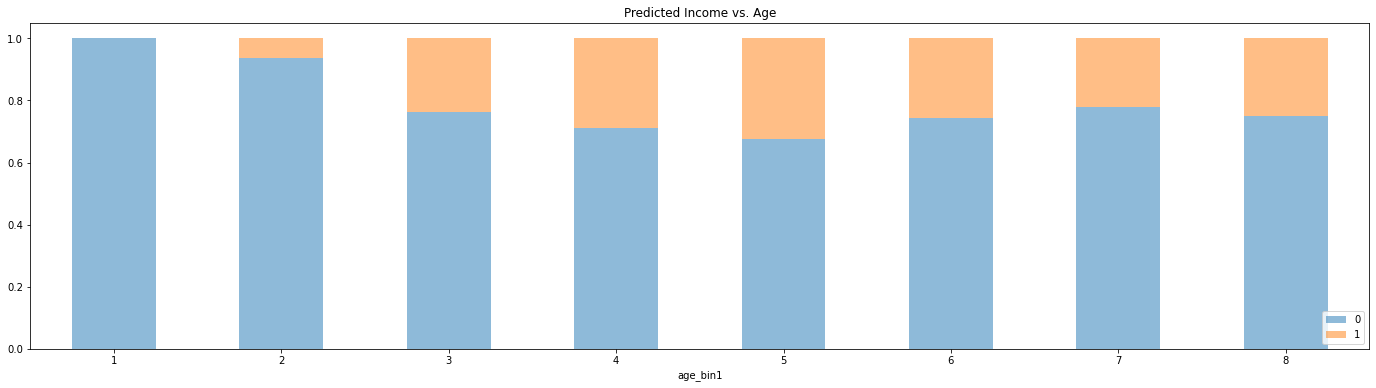

In [342]:
crosstab = pd.crosstab(X_val_pred["age_bin1"], X_val_pred["Predicted_Income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Predicted Income vs. Age", alpha=0.5,figsize=(24,6))
plt.xticks(rotation=0)
plt.legend(loc=4)
plt.show()

<AxesSubplot:>

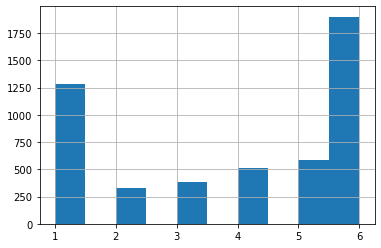

In [346]:
X_val_pred['demogweight_bin1'] = X_val_pred['demogweight']
X_val_pred.loc[X_val_pred['demogweight_bin1'] <= 120000, 'demogweight_bin1'] = 1
X_val_pred.loc[(X_val_pred['demogweight_bin1'] > 120000) & (X_val_pred['demogweight_bin1'] <= 140000), 'demogweight_bin1'] = 2
X_val_pred.loc[(X_val_pred['demogweight_bin1'] > 140000) & (X_val_pred['demogweight_bin1'] <= 160000), 'demogweight_bin1'] = 3
X_val_pred.loc[(X_val_pred['demogweight_bin1'] > 160000) & (X_val_pred['demogweight_bin1'] <= 180000), 'demogweight_bin1'] = 4
X_val_pred.loc[(X_val_pred['demogweight_bin1'] > 180000) & (X_val_pred['demogweight_bin1'] <= 200000), 'demogweight_bin1'] = 5
X_val_pred.loc[(X_val_pred['demogweight_bin1'] > 200000), 'demogweight_bin1'] = 6
X_val_pred["demogweight_bin1"].hist()

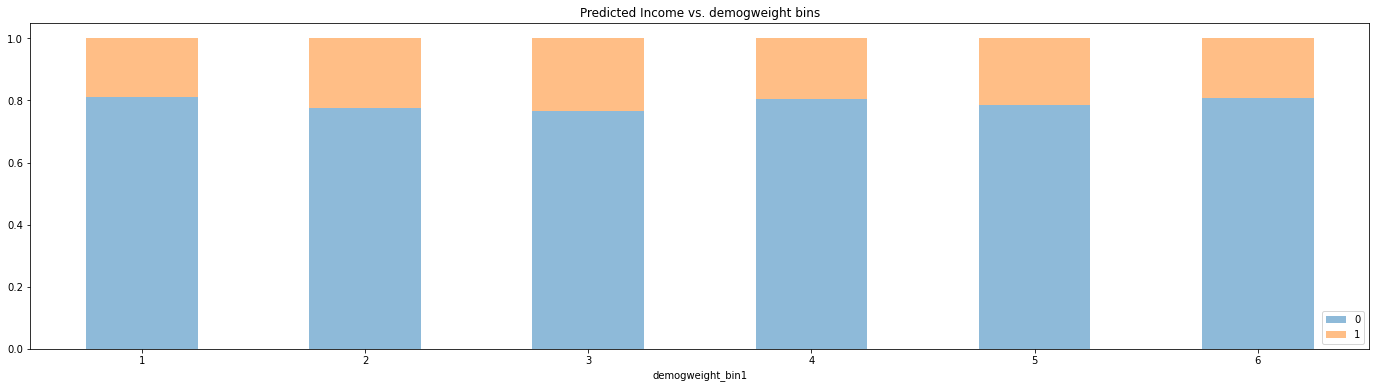

In [348]:
crosstab = pd.crosstab(X_val_pred["demogweight_bin1"], X_val_pred["Predicted_Income"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Predicted Income vs. demogweight bins", alpha=0.5,figsize=(24,6))
plt.xticks(rotation=0)
plt.legend(loc=4)
plt.show()

In [265]:
misclassified = [i for i in range(len(y_pred_label2)) if y_pred_label2[i] != list(y_val)[i]]

In [266]:
mis_df = pd.DataFrame(scaled_X_val[misclassified],columns=X_train.columns)

In [267]:
mis_df.head()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.178082,0.090694,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.150685,0.124926,0.0,0.0,0.653061,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.438356,0.136569,0.0,0.0,0.479592,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.356164,0.120922,0.0,0.0,0.551020,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.301370,0.202871,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [268]:
mis_df["true_label"] = np.array(y_val)[misclassified]

In [269]:
mis_df.head()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,true_label
0,0.178082,0.090694,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.150685,0.124926,0.0,0.0,0.653061,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.438356,0.136569,0.0,0.0,0.479592,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.356164,0.120922,0.0,0.0,0.551020,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.301370,0.202871,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [270]:
mis_df["true_label"].value_counts()

1    469
0    296
Name: true_label, dtype: int64

In [271]:
mis_df_0 = mis_df[mis_df["true_label"]==0]

In [272]:
mis_df_1 = mis_df[mis_df["true_label"]==1]

In [273]:
mis_df_0.describe()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,true_label
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.0,296.000000,...,296.000000,296.0,296.0,296.000000,296.0,296.0,296.000000,296.0,296.000000,296.0
mean,0.371529,0.120471,0.003487,0.048767,0.448359,0.016892,0.040541,0.121622,0.0,0.658784,...,0.003378,0.0,0.0,0.006757,0.0,0.0,0.885135,0.0,0.003378,0.0
std,0.180267,0.067389,0.011680,0.139489,0.117745,0.129085,0.197557,0.327402,0.0,0.474921,...,0.058124,0.0,0.0,0.082060,0.0,0.0,0.319399,0.0,0.058124,0.0
min,0.054795,0.002332,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,0.219178,0.075843,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
50%,0.335616,0.112408,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
75%,0.479452,0.153507,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
max,1.000000,0.361909,0.050131,0.597567,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0


In [274]:
mis_df_0.describe()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,true_label
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.0,296.000000,...,296.000000,296.0,296.0,296.000000,296.0,296.0,296.000000,296.0,296.000000,296.0
mean,0.371529,0.120471,0.003487,0.048767,0.448359,0.016892,0.040541,0.121622,0.0,0.658784,...,0.003378,0.0,0.0,0.006757,0.0,0.0,0.885135,0.0,0.003378,0.0
std,0.180267,0.067389,0.011680,0.139489,0.117745,0.129085,0.197557,0.327402,0.0,0.474921,...,0.058124,0.0,0.0,0.082060,0.0,0.0,0.319399,0.0,0.058124,0.0
min,0.054795,0.002332,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,0.219178,0.075843,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
50%,0.335616,0.112408,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
75%,0.479452,0.153507,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
max,1.000000,0.361909,0.050131,0.597567,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0


In [275]:
means_mis = mis_df.describe(include='all').loc['mean']
means_val = pd.DataFrame(scaled_X_val,columns=X_train.columns).describe(include='all').loc['mean']

In [276]:
means_df = pd.DataFrame([means_mis,means_val])

In [277]:
means_df

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,true_label
mean,0.361859,0.115082,0.008302,0.029096,0.439082,0.035294,0.04183,0.073203,0.0,0.67451,...,0.001307,0.0000,0.002614,0.002614,0.0000,0.0000,0.905882,0.0000,0.002614,0.613072
mean,0.295715,0.117010,0.009698,0.019253,0.402835,0.057200,0.03020,0.061400,0.0,0.70300,...,0.003200,0.0006,0.002200,0.001400,0.0008,0.0004,0.893800,0.0018,0.000400,NaN


In [278]:
means_df = means_df.T

(e) Which occupations are associated with predicted income over $50,000? Which education levels? Which ages? Is this intuitive? Construct graphs of the top three categorical predictors, and their relationship to predicted income. Make sure you fine-tune these graphs, and arrange the graphs so that they are truly helpful

- predicted class = `1`.

## Train the best model using all the training data. 

### Part 2

### Best Neural Network

In [290]:
scaler2 = preprocessing.MinMaxScaler()

In [291]:
scaled_X = scaler2.fit_transform(X)

In [292]:
grid_result.best_params_

{'batch_size': 16,
 'init': 'normal',
 'nb_epoch': 75,
 'neurons': [256, 128],
 'optimizer': <keras.optimizer_v2.adam.Adam at 0x7f7c61724850>}

In [294]:
final_model = create_model([256, 128], init='normal', optimizer=adam)

In [295]:
final_model.fit(scaled_X,y,epochs=75, batch_size=16,verbose=1)

Epoch 1/75
1563/1563 [==============================] - 3s 1ms/step - loss: 0.3581 - accuracy: 0.8244 - precision: 0.6930 - recall: 0.4812 - auc: 0.8521 - prc: 0.6539
Epoch 2/75
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3261 - accuracy: 0.8469 - precision: 0.7163 - recall: 0.5969 - auc: 0.9020 - prc: 0.7464
Epoch 3/75
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3168 - accuracy: 0.8532 - precision: 0.7274 - recall: 0.6188 - auc: 0.9077 - prc: 0.7620
Epoch 4/75
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3108 - accuracy: 0.8540 - precision: 0.7316 - recall: 0.6160 - auc: 0.9112 - prc: 0.7710
Epoch 5/75
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3069 - accuracy: 0.8564 - precision: 0.7379 - recall: 0.6205 - auc: 0.9134 - prc: 0.7776
Epoch 6/75
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3015 - accuracy: 0.8602 - precision: 0.7464 - recall: 0.6300 - auc: 0.9170 - prc: 0.783

In [303]:
y_pred_final = final_model.predict(scaled_X)
y_pred_final_label = (final_model.predict(scaled_X)>0.5).astype(int)

In [305]:
accuracy_score(y,y_pred_final_label)

0.9228

In [306]:
roc_auc_score(y,y_pred_final)

0.9772087112049184

In [307]:
cf_best = confusion_matrix(y, y_pred_final_label)

<AxesSubplot:>

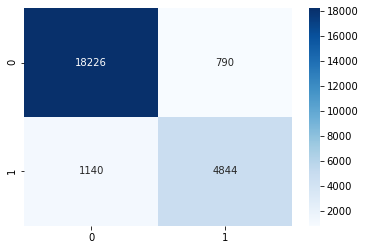

In [308]:
sns.heatmap(cf_best, annot=True, cmap='Blues', fmt='d')

<AxesSubplot:>

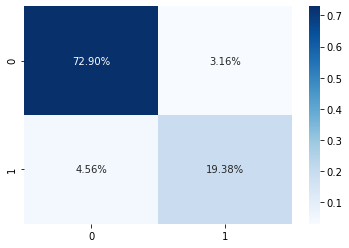

In [309]:
sns.heatmap(cf_best/np.sum(cf_best), annot=True, 
            fmt='.2%', cmap='Blues')

In [310]:
df_test = pd.read_csv("USCensusTest.csv")

In [311]:
df_test.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,44,Private,162028,11th,7,Divorced,Sales,Unmarried,White,Female,0,0,44,United-States
1,20,Private,197997,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
2,46,Private,98350,10th,6,Married-spouse-absent,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,37,China
3,39,Private,165848,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
4,34,Private,178615,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States


In [312]:
df_test.shape

(7561, 14)

In [313]:
df_test = df_test.drop("education-num",axis=1)

In [314]:
df_test_dum = pd.get_dummies(df_test, columns = categorical_cols)

In [315]:
df_test_dum.head()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,44,162028,0,0,44,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,20,197997,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,46,98350,0,0,37,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,39,165848,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,34,178615,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [316]:
train_dum_lst = list(X.columns)

In [317]:
test_dum_lst = list(df_test_dum.columns)

In [318]:
len(train_dum_lst), len(test_dum_lst)

(107, 106)

In [319]:
list(set.difference(set(train_dum_lst),set(test_dum_lst)))

['native-country_Holand-Netherlands']

In [320]:
cols = list(set.difference(set(train_dum_lst),set(test_dum_lst)))

In [321]:
df_test_dum[cols] = np.array([0]*df_test_dum.shape[0])

Test dataset also should be transformed according to the training data distribution since we assume that we don't know about the test data distribution during prediction. 

In [322]:
df_test_dum.shape

(7561, 107)

In [323]:
df_test_dum.head()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_Holand-Netherlands
0,44,162028,0,0,44,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,20,197997,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,46,98350,0,0,37,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,39,165848,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,34,178615,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [324]:
df_test_dum = df_test_dum[X.columns]

In [325]:
scaled_X_test = scaler2.transform(df_test_dum)

In [326]:
y_pred_test = best_model.predict(scaled_X_test)

In [327]:
y_pred_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [329]:
np.savetxt("Team8Prediction.txt",y_pred_test)

## Decision Tree-based model (for general discussion)
- random forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
X.head()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [176]:
rf_clf = RandomForestClassifier()

In [177]:
rf_clf.fit(X,y)

RandomForestClassifier()

In [390]:
y_pred_rf = rf_clf.predict(X)

In [179]:
accuracy_score(y,y_pred_rf)

0.99992

In [180]:
roc_auc_score(y,y_pred_rf)

0.9998328877005347

In [182]:
confusion_matrix(y,y_pred_rf)

array([[19016,     0],
       [    2,  5982]], dtype=int64)

Do notice that random forest may have the risk of overfitting here. 